In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import cov
import csv
import glob
import seaborn as sn
from scipy.stats import pearsonr,spearmanr

## 1. Ввод данных

In [45]:
# specifying the path to csv files
path = "DATA/"
# xlsx files in the path
file_list = glob.glob(path + "/*.xlsx")
print(file_list)

['DATA\\Daily Report 2-1-2021.xlsx', 'DATA\\Daily Report 2-2-2021.xlsx']


In [55]:
excl_list = []
for file in file_list:
    df = pd.read_excel(file, sheet_name='Daily', usecols="A:R", skiprows=0,nrows=5760, header = 0)
    df = pd.DataFrame(df) #преобразование в датафрейм
    df[["Date","Time"]]=df[["Date","Time"]].astype(str) #присвоение строкам типа "строка"
    df['timestamp']=pd.to_datetime(df.Date + ' ' + df.Time) #создание колонки с типом данных datetime
    df_changed=df #создание нового датафрейма
    df_changed.drop(['Date','Time'], inplace=True, axis=1) #убрать колонки Date and Time
    titles=list(df_changed.columns)
    titles[0],titles[16]=titles[16],titles[0] # смена порядка колонок
    df_changed=df_changed[titles]
    excl_list.append(df_changed)#добавляем новый элементв в конец
excl_merged = pd.concat(excl_list, axis=0, ignore_index=False) #конкатенация всех листов
excl_merged.head(4)

,timestamp,Hydraulic BAR Pressure bar,Current Curve Selected,Bowl Speed RPM RPM,Differential Speed RPM,Sludge Flow m3h,Centrifuge Vibration mm/sec,Solids End Bearing Temp Â°C,Liquid End Bearing Temp Â°C,SCI Scale Weight,SCI Scale Totalizer,Diverter Open %,Lube Flow Solid End,Lube Flow Liquid A,Lube Flow Liquid B,Hydraulic Temp,Bowl Speed %
0,2021-02-01 00:00:00,78.531898,1,1711,11.932508,86.082176,1.867694,76.106628,82.533424,9.548612,51010,100.0,91.634109,100.025322,92.494934,52.535667,69
1,2021-02-01 00:00:15,87.131073,1,1786,12.011719,38.682724,3.063368,76.118706,82.527382,7.646484,51010,100.0,91.116898,100.047012,92.715569,52.535667,72
2,2021-02-01 00:00:30,87.131073,1,1786,12.011719,38.682724,3.063368,76.118706,82.527382,7.646484,51010,100.0,91.116898,100.047012,92.715569,52.535667,72
3,2021-02-01 00:00:45,79.038269,1,1740,11.949870,363.299347,2.782335,76.118706,82.551537,7.327474,51010,100.0,90.917969,100.025322,92.661316,52.535667,70


In [7]:
excl_merged.to_excel('DATA_EXPORT/Total.xlsx', index = False)   

## 2. Анализ массива данных

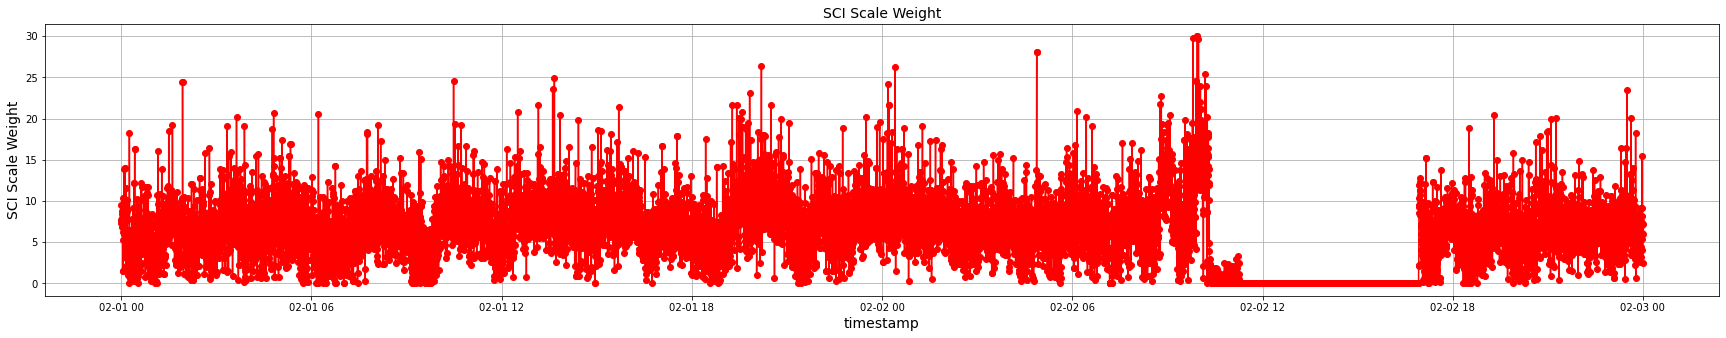

In [15]:
plt.figure(figsize=(30, 5))
plt.plot(excl_merged['timestamp'], excl_merged['SCI Scale Weight'], color='red', marker='o')
plt.title('SCI Scale Weight', fontsize=14)
plt.xlabel('timestamp', fontsize=14)
plt.ylabel('SCI Scale Weight', fontsize=14)
plt.grid(True)
plt.show()

In [56]:
corr=df_changed
corr.drop('timestamp', inplace=True, axis=1) #убрать колонку timestamp
corrMatrix = corr.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')
#sn.heatmap(corrMatrix, annot=True)
#plt.show()

C:\Users\Nepsh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Hydraulic BAR Pressure bar,Current Curve Selected,Bowl Speed RPM RPM,Differential Speed RPM,Sludge Flow m3h,Centrifuge Vibration mm/sec,Solids End Bearing Temp Â°C,Liquid End Bearing Temp Â°C,SCI Scale Weight,SCI Scale Totalizer,Diverter Open %,Lube Flow Solid End,Lube Flow Liquid A,Lube Flow Liquid B,Hydraulic Temp,Bowl Speed %
Hydraulic BAR Pressure bar,1.000000,-0.239746,0.922439,0.839018,0.606078,0.431950,0.853199,0.852467,0.700845,0.084085,0.908319,0.841837,0.856226,0.847307,0.592727,0.923008
Current Curve Selected,-0.239746,1.000000,-0.177824,0.120502,-0.258280,0.103724,-0.022140,-0.008667,-0.185219,0.051649,-0.308540,0.139576,0.120558,0.141321,0.073106,-0.179113
Bowl Speed RPM RPM,0.922439,-0.177824,1.000000,0.938630,0.743173,0.461755,0.904375,0.904303,0.708488,0.092363,0.976375,0.938563,0.948024,0.940715,0.573579,0.999962
Differential Speed RPM,0.839018,0.120502,0.938630,1.000000,0.684575,0.506368,0.872073,0.876585,0.651957,0.097036,0.887256,0.991096,0.990325,0.990970,0.556894,0.938299
Sludge Flow m3h,0.606078,-0.258280,0.743173,0.684575,1.000000,0.285446,0.650115,0.644786,0.611390,0.070555,0.765261,0.682770,0.686286,0.678686,0.374777,0.740758
Centrifuge Vibration mm/sec,0.431950,0.103724,0.461755,0.506368,0.285446,1.000000,0.443968,0.445925,0.305841,0.074309,0.432942,0.508626,0.506984,0.508439,0.300092,0.461818
Solids End Bearing Temp Â°C,0.853199,-0.022140,0.904375,0.872073,0.650115,0.443968,1.000000,0.997173,0.644777,0.206823,0.858799,0.891602,0.906376,0.899677,0.812913,0.903705
Liquid End Bearing Temp Â°C,0.852467,-0.008667,0.904303,0.876585,0.644786,0.445925,0.997173,1.000000,0.640540,0.204322,0.856717,0.898130,0.910733,0.904710,0.800558,0.903666
SCI Scale Weight,0.700845,-0.185219,0.708488,0.651957,0.611390,0.305841,0.644777,0.640540,1.000000,0.063977,0.716470,0.654604,0.663590,0.657173,0.450071,0.707691
SCI Scale Totalizer,0.084085,0.051649,0.092363,0.097036,0.070555,0.074309,0.206823,0.204322,0.063977,1.000000,0.087157,0.097998,0.097868,0.097861,0.558221,0.092317


['DATA\\Daily Report 2-1-2021.xlsx', 'DATA\\Daily Report 2-2-2021.xlsx']


## Расчет корреляции двух рядов данных

In [2]:
#Расчет корреляции двух рядов данных
Indicators = {'System type': ['SS','PS','CL','IP','IR','DR'], 'R, bit/s': [133.405, 162.922,786.134,1146.229,444.442,1740.166],
        'MTBF (year)': [37,441,438,448,51,27917],
                }
df = pd.DataFrame(Indicators, columns = ['System type', 'R, bit/s','MTBF (year)'])

print (df)

  System type  R, bit/s  MTBF (year)
0          SS   133.405           37
1          PS   162.922          441
2          CL   786.134          438
3          IP  1146.229          448
4          IR   444.442           51
5          DR  1740.166        27917


In [3]:
R=df.iloc[:,1],
MTBF=df.iloc[:,2]
print (MTBF)

0       37
1      441
2      438
3      448
4       51
5    27917
Name: MTBF (year), dtype: int64


In [6]:
# calculate Pearson's correlation
covariance = cov(R, MTBF)
corr, _ = pearsonr(df.iloc[:,1], df.iloc[:,2])
corr1, _ = spearmanr(df.iloc[:,1], df.iloc[:,2])
print(covariance, 'Pearsons correlation: %.3f' % corr, 'Spearmans correlation: %.3f' % corr1)

[[3.91138917e+05 5.59247196e+06]
 [5.59247196e+06 1.27311103e+08]] Pearsons correlation: 0.793 Spearmans correlation: 0.829
